In [1]:
import numpy as np
import pandas as pd
from SurvivalEVAL import ScikitSurvivalEvaluator, LifelinesEvaluator
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance

from utils.models import run_rsf_model, run_cox_model, run_metrics, plot_rsf_feature_importances, \
    plot_cox_box_coefficients, get_data_splits, run_rsf_model_varying_estimators, run_cox_model_varying_penalizer, \
    log_plot_cox, plot_rsf_varying_estimators, run_rsf_model_param_tuning, preprocess_and_fit_cox_model, \
    plot_calibration_curve, plot_d_calibration
from utils.config import load_datasets, get_generated_gan_train_dataset_indexes, get_test_dataset_indexes,     get_generated_vae_dataset_indexes, get_train_dataset_indexes
from utils.splitting import stratified_split
import joblib 

In [2]:
test_folder = "../outputs/test_sets"
test_indexes = get_test_dataset_indexes(test_folder)
test_sets = load_datasets(folder=test_folder, names=test_indexes)

sim_folder = "../outputs/generated_datasets"
folder = "../outputs/datasets"
gan_dataset_indexes = get_generated_gan_train_dataset_indexes(sim_folder)
vae_dataset_indexes = get_generated_vae_dataset_indexes(sim_folder)
# timevary_dataset_indexes = get_generated_timevary_dataset_indexes(sim_folder)
real_dataset_indexes = get_train_dataset_indexes(folder)
gan_datasets = load_datasets(folder=sim_folder, names=gan_dataset_indexes) 
vae_datasets = load_datasets(folder=sim_folder, names=vae_dataset_indexes) 
# timevary_datasets = load_datasets(folder=sim_folder, names=timevary_dataset_indexes) 
real_datasets = load_datasets(folder=folder, names=real_dataset_indexes)



In [3]:
gan = gan_datasets['flchain_gan']
vae = vae_datasets['flchain_vae']

# Perform a train-test split for the GAN dataset with stratification
gan_train, gan_test = stratified_split(gan, is_td=False)
vae_train, vae_test = stratified_split(vae, is_td=False)


ValueError with 10 quantiles: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.


In [4]:
vae_train

,fac_sex_M,fac_chapter_Circulatory,fac_chapter_Congenital,fac_chapter_Digestive,fac_chapter_Endocrine,fac_chapter_External Causes,fac_chapter_Genitourinary,fac_chapter_Ill Defined,fac_chapter_Infectious,fac_chapter_Injury and Poisoning,...,fac_mgus_Y,num_age,num_kappa,num_lambda,num_flc_grp,num_creatinine,num_sample_yr,pid,event,time
3380,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.042462,-0.308672,0.566311,1.574733,0.061767,0.121147,3706.219868,0.0,4333.704102
3640,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.843063,-0.592624,-0.349484,-0.861638,1.130940,0.121147,2083.399505,0.0,4283.668457
3376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.191291,-1.029959,-1.065234,-1.557744,-0.483493,-0.448028,2408.085726,0.0,3228.641602
3684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.242961,-0.281677,-0.306760,-0.513585,-0.216320,-0.448028,6194.808513,0.0,4344.430176
350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.766951,-0.359159,-0.429306,-0.513585,0.467079,1.259498,5608.830804,0.0,3359.088135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.247757,0.380155,0.568601,1.226680,-0.212306,0.121147,3376.549555,0.0,4864.792969
3237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.780244,-0.301111,-1.182384,-1.557744,-0.489066,0.121147,4406.416720,1.0,1568.596924
4899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.739672,-0.397371,-0.510635,-0.513585,-0.783427,-0.448028,512.353451,1.0,1505.771851
3499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.786091,1.014325,-0.477863,1.574733,-1.330062,0.121147,5409.441758,1.0,2955.053223


In [5]:
gan_train

,fac_sex_M,fac_chapter_Circulatory,fac_chapter_Congenital,fac_chapter_Digestive,fac_chapter_Endocrine,fac_chapter_External Causes,fac_chapter_Genitourinary,fac_chapter_Ill Defined,fac_chapter_Infectious,fac_chapter_Injury and Poisoning,...,fac_mgus_Y,num_age,num_kappa,num_lambda,num_flc_grp,num_creatinine,num_sample_yr,pid,event,time
4498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.737255,-0.244876,0.054171,0.530574,0.277862,1.259498,5977.088695,0.0,3463.489990
3677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.213437,-0.204226,0.026376,0.182521,-0.533949,3.536199,4228.915964,0.0,1082.072388
3301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.056665,-0.918295,-0.528426,-1.557744,0.618127,-0.448028,1913.091633,0.0,4882.091797
3900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.825193,-0.277816,1.022203,1.226680,0.360727,0.121147,630.723470,0.0,3111.425293
2745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.228980,-1.139257,-0.615582,-0.165532,-0.285930,-0.448028,7236.608617,0.0,4990.032715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.759600,-1.039718,-0.485721,-1.557744,-0.289020,-0.448028,1816.418623,1.0,2203.806396
1440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.593286,-0.841411,-0.322090,-1.209691,-0.060042,0.121147,3173.009023,1.0,570.703552
2678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.205387,-0.835641,1.410302,-0.861638,-0.330809,-0.448028,7150.854589,0.0,4675.116211
2454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.191619,-0.511833,-0.129484,-0.165532,-0.167912,-0.448028,3890.366006,0.0,4709.412109


In [4]:
cox_model_vae, cox_survival_function_vae, median_vae, cox_hazard_vae, vae_train, vae_test = preprocess_and_fit_cox_model(vae_train, vae_test, "time", "event")

Dropping low variance columns: ['fac_chapter_Congenital', 'fac_chapter_Endocrine', 'fac_chapter_Injury and Poisoning', 'fac_chapter_Musculoskeletal', 'fac_chapter_Skin']
Column fac_chapter_Infectious may cause complete separation. Variance when event is present: 0.0024242352746876804, when not present: 0.0
Column fac_sample_yr_2002 may cause complete separation. Variance when event is present: 0.0, when not present: 0.002237961527178241
Column fac_mgus_Y may cause complete separation. Variance when event is present: 0.0, when not present: 0.0011202380453459626
Dropping columns with potential complete separation: ['fac_chapter_Infectious', 'fac_sample_yr_2002', 'fac_mgus_Y']


In [7]:
best_rsf_model, best_rsf_function, best_rsf_hazard, best_rsf_feature_importances, clean_rsf_survival_function = run_rsf_model_param_tuning(vae_train, vae_test)

C:\Users\johan\anaconda3\envs\reseach_project_models_env\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [8]:
cox_model_vae.print_summary()

<lifelines.CoxPHFitter: fitted with 3500 total observations, 2676 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 3500
number of events observed = 824
   partial log-likelihood = -5250.51
         time fit was run = 2024-09-04 18:12:39 UTC

---
                             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                    
fac_sex_M                   -0.04      0.96      0.06           -0.16            0.08                0.85                1.08
fac_chapter_Circulatory      0.85      2.34      0.10            0.66            1.04                1.94                2.82
fac_chapter_Digestive        1.07      2.92      0.23            0.63            1.52                1.87                4.56
fac_chapter_External Causes -0.10      0.90      0.34           -0.77            0.57                0.46                1.77
fac_chapter_Genitourinary   -0.07      0.93      0.24           -0.54            0.40                0.58                1.49
fac_chapter_Ill Defined     -0.23      0.79      0.67           -1.55            1.09                0.21                2.96
fac_chapter_Mental          -0.23      0.79      0.16           -0.55            0.08                0.58                1.09
fac_chapter_Neoplasms        0.93      2.53      0.09            0.75            1.10                2.12                3.01
fac_chapter_Nervous         -0.11      0.89      0.18           -0.46            0.23                0.63                1.26
fac_chapter_Respiratory      0.62      1.87      0.12            0.39            0.86                1.47                2.36
fac_chapter_missing         -2.63      0.07      0.08           -2.78           -2.47                0.06                0.08
fac_sample_yr_1996          -0.02      0.98      0.06           -0.15            0.10                0.86                1.11
fac_sample_yr_1997           0.07      1.07      0.09           -0.11            0.24                0.90                1.28
fac_sample_yr_1998           0.04      1.04      0.13           -0.22            0.30                0.80                1.36
fac_sample_yr_1999           0.38      1.47      0.19            0.01            0.76                1.01                2.13
fac_sample_yr_2000           0.17      1.19      0.28           -0.37            0.71                0.69                2.04
fac_sample_yr_2001           0.27      1.31      0.26           -0.23            0.77                0.79                2.17
fac_sample_yr_2003           0.15      1.16      0.25           -0.34            0.63                0.71                1.89
num_age                      0.25      1.28      0.04            0.17            0.32                1.19                1.38
num_kappa                    0.18      1.20      0.04            0.10            0.26                1.10                1.30
num_lambda                   0.23      1.25      0.05            0.12            0.33                1.13                1.39
num_flc_grp                  0.07      1.08      0.04            0.00            0.14                1.00                1.15
num_creatinine               0.16      1.17      0.05            0.07            0.25                1.07                1.29
num_sample_yr                0.16      1.17      0.04            0.08            0.24                1.09                1.27
pid                         -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00

                             cmp to      z      p  -log2(p)
covariate                                                  
fac_sex_M                      0.00  -0.67   0.51   

In [9]:

train_event_times_vae, train_event_indicators_vae, test_event_times_vae, test_event_indicators_vae = get_data_splits(vae_train, vae_test)

cox_model_evals = LifelinesEvaluator(cox_survival_function_vae, test_event_times_vae, test_event_indicators_vae, train_event_times_vae, train_event_indicators_vae)
rsf_model_evals = ScikitSurvivalEvaluator(clean_rsf_survival_function, test_event_times_vae, test_event_indicators_vae, train_event_times_vae, train_event_indicators_vae)

vae_metrics = {
    "concordance_cox": cox_model_evals.concordance()[0],
    "concordance_rsf": rsf_model_evals.concordance()[0],
    "brier_cox": cox_model_evals.brier_score(),
    "brier_rsf": rsf_model_evals.brier_score(),
    "ibs_cox": cox_model_evals.integrated_brier_score(),
    "ibs_rsf": rsf_model_evals.integrated_brier_score(),
    "cox_one_cal": cox_model_evals.one_calibration(np.median(test_event_times_vae)),
    "rsf_one_cal": rsf_model_evals.one_calibration(np.median(test_event_times_vae)),
    "cox_d_cal": cox_model_evals.d_calibration(),
    "rsf_d_cal": rsf_model_evals.d_calibration(),
    "mae_cox": cox_model_evals.mae(),
    "mae_rsf": rsf_model_evals.mae(),
    "rmse_cox": cox_model_evals.rmse(),
    "rmse_rsf": rsf_model_evals.rmse(),
}

C:\Users\johan\anaconda3\envs\reseach_project_models_env\Lib\site-packages\SurvivalEVAL\Evaluator.py:60: UserWarning: The first time coordinate is not 0. A authentic survival curve should start from 0 with 100% survival probability. Adding 0 to the beginning of the time coordinates and 1 to the beginning of the predicted curves.
  warnings.warn("The first time coordinate is not 0. A authentic survival curve should start from 0 "


In [10]:
print(vae_metrics)

{'concordance_cox': 0.9447181310898498, 'concordance_rsf': 0.9545337577343846, 'brier_cox': 0.020730355456912535, 'brier_rsf': 0.012942921781704475, 'ibs_cox': 0.029488861963016134, 'ibs_rsf': 0.024430573627959255, 'cox_one_cal': (3.552713678800501e-15, [1.0, 0.9792547378737236, 0.6229626878635298, 0.01594591146829949, 0.020576131687242816, 0.0, 0.007407407407407418, 0.00666666666666671, 0.0, 0.00694444444444442], [0.9899835904088151, 0.8990768649406763, 0.5057124629362221, 0.13610875915312626, 0.0975024862856532, 0.0786424842937086, 0.06657912387484974, 0.05544318787047371, 0.04732785384715001, 0.03770105987159442]), 'rsf_one_cal': (0.0011081097546989938, [1.0, 0.9717655947905461, 0.6226772871567221, 0.008000000000000007, 0.02879313865632016, 0.0, 0.0, 0.0, 0.00666666666666671, 0.0], [0.9527348805804945, 0.9180725636092173, 0.6025775817255379, 0.06349622872809295, 0.02783832454221977, 0.017039533381467045, 0.01205056968388657, 0.00852476343893615, 0.006076260949760662, 0.0044041287400

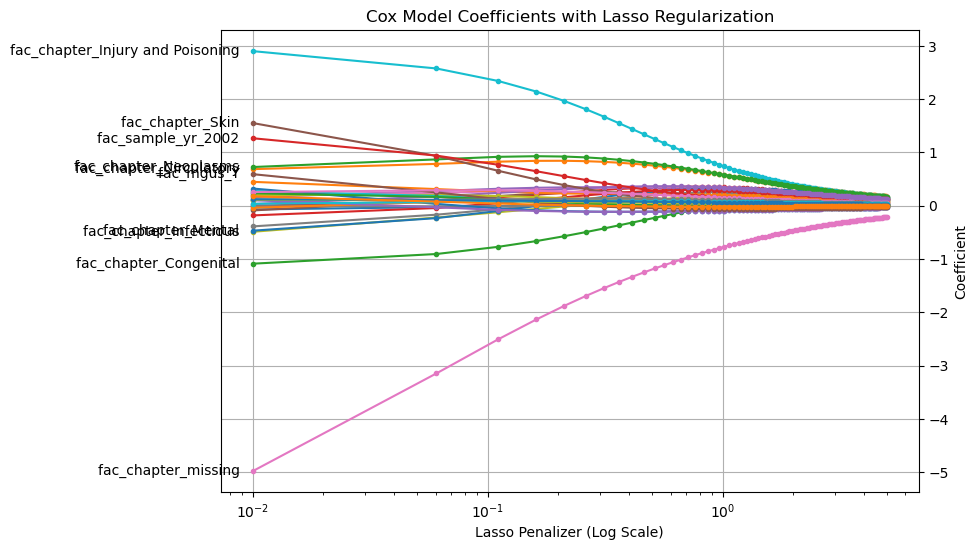

In [11]:
lasso_penalizers = np.linspace(0.01, 5, 100)
results_cox = run_cox_model_varying_penalizer(gan_train, gan_test, lasso_penalizers)
coefs = pd.DataFrame({penalizer: result[3] for penalizer, result in results_cox.items()})
log_plot_cox(coefs, n_highlight=10)

In [ ]:
n_estimators_list = [10, 50, 100, 200, 500, 1000]
results_rsf = run_rsf_model_varying_estimators(vae_train, vae_test, n_estimators_list)
plot_rsf_varying_estimators(results_rsf)

In [12]:
joblib.dump(best_rsf_model, 'parameter_tuned_rsf.pkl')


['parameter_tuned_rsf.pkl']

In [13]:
best_rsf = joblib.load('parameter_tuned_rsf.pkl')

In [14]:
data_pre = vae_train.drop(columns=['pid', 'event', 'time'], errors='ignore')
test_pre = vae_train.drop(columns=['pid', 'event', 'time'], errors='ignore')
# y_train = np.array(list(zip(train_event_indicators, train_event_times)),
#                    dtype=[('event', 'bool'), ('time', 'float')])
y_test = np.array(list(zip(test_event_indicators_vae, test_event_times_vae)), dtype=[('event', 'bool'), ('time', 'float')])

rsf_survival_function = best_rsf.predict_survival_function(test_pre, return_array=True)
hazard = best_rsf.predict_cumulative_hazard_function(test_pre, return_array=True)
clean_rsf_survival_function = best_rsf.predict_survival_function(test_pre)
result = permutation_importance(best_rsf, test_pre, y_test, n_repeats=15, random_state=42)
feature_importance = pd.DataFrame(
    {
        k: result[k]
        for k in ("importances_mean", "importances_std")
    },
    index=test_pre.columns,
).sort_values(by="importances_mean", ascending=False)

ValueError: Found input variables with inconsistent numbers of samples: [1500, 1500, 3500]

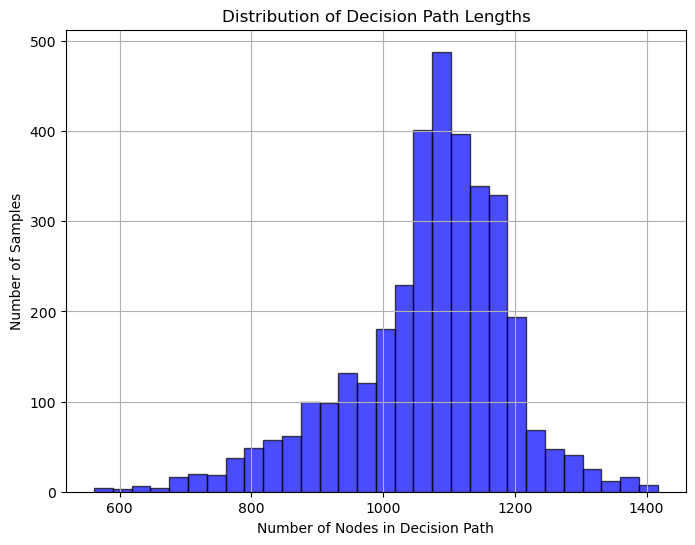

In [16]:
decision_path_matrix,_ = best_rsf.decision_path(data_pre)

# Convert to a dense matrix to count unique paths
dense_path_matrix = decision_path_matrix.toarray()

# Sum across rows to get the number of decisions made per sample
decision_counts = dense_path_matrix.sum(axis=1)

# Plot histogram of decision counts
plt.figure(figsize=(8, 6))
plt.hist(decision_counts, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Decision Path Lengths')
plt.xlabel('Number of Nodes in Decision Path')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

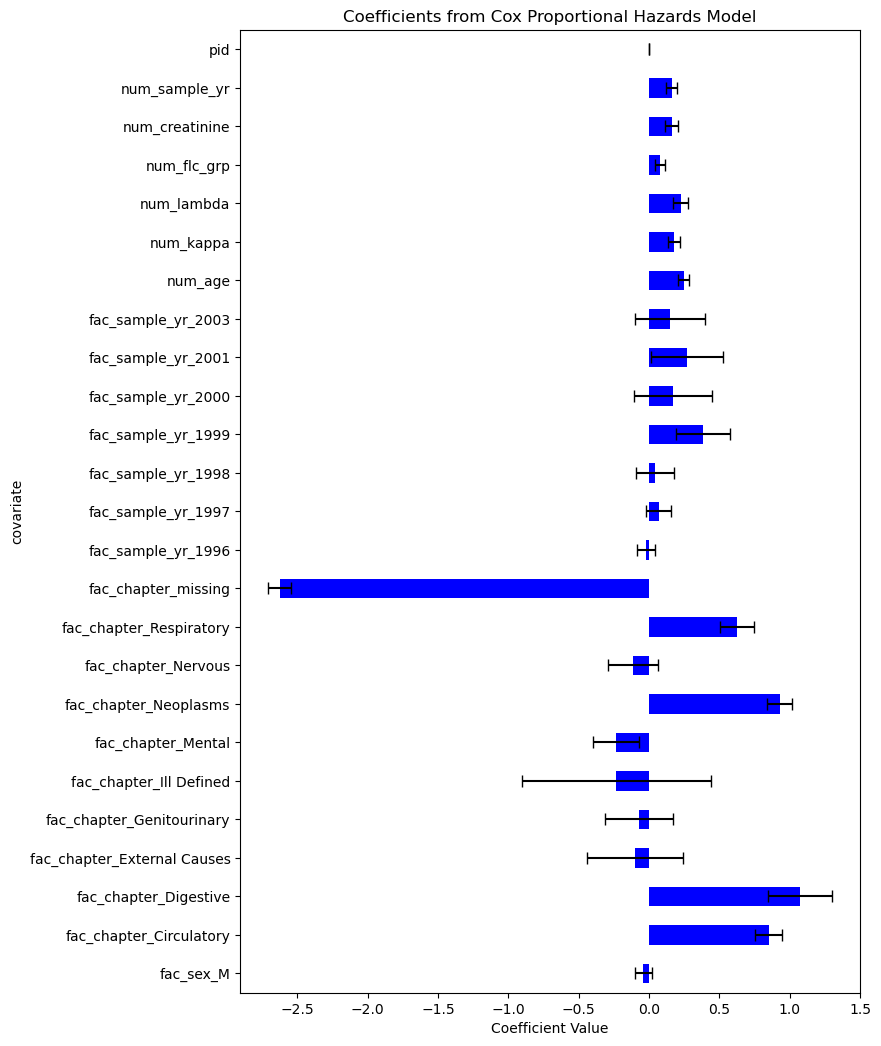

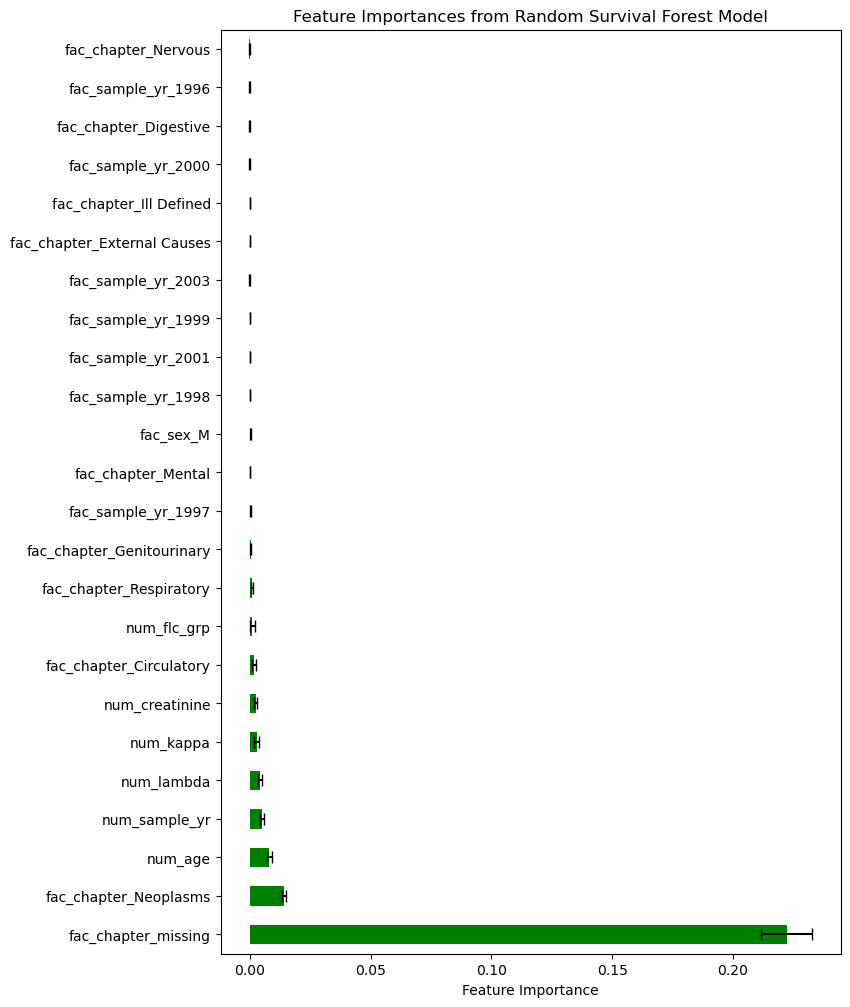

In [18]:
plot_cox_box_coefficients(cox_model_vae)
plot_rsf_feature_importances(best_rsf_feature_importances)
# plot_rsf_feature_importances(best_rsf_feature_importances)

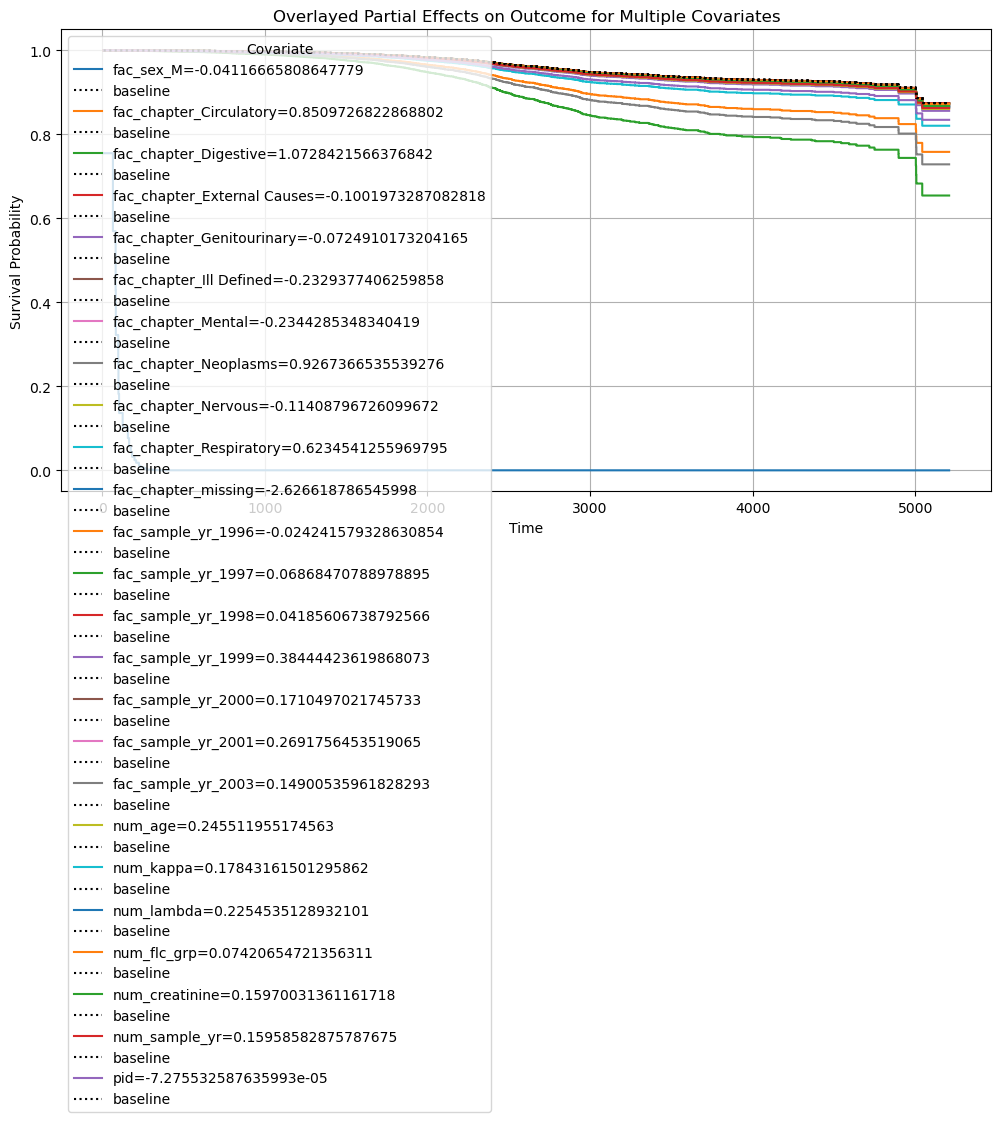

In [19]:
# Assuming `cox_model` is your fitted Cox model
covariate_names = cox_model_vae.params_.index

plt.figure(figsize=(12, 6))

# Overlay the survival functions for different covariates
for covariate in covariate_names:
    # Generate the partial effects on outcome for the given covariate
    cox_model_vae.plot_partial_effects_on_outcome(covariates=[covariate], values=[cox_model_vae.params_[covariate]], ax=plt.gca(), label=covariate)

plt.title("Overlayed Partial Effects on Outcome for Multiple Covariates")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Covariate")
plt.show()


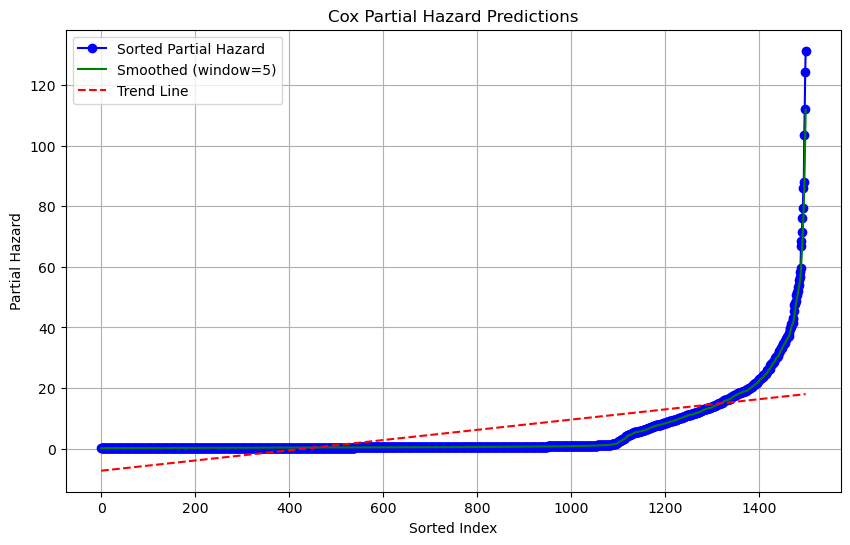

In [20]:
sorted_hazard = cox_hazard_vae.sort_values()
smoothed_hazard = sorted_hazard.rolling(window=5, min_periods=1).mean()
indices = np.arange(len(sorted_hazard))
plt.figure(figsize=(10, 6))
plt.plot(indices, sorted_hazard.values, marker='o', linestyle='-', color='b', label='Sorted Partial Hazard')
plt.plot(indices, smoothed_hazard.values, linestyle='-', color='g', label=f'Smoothed (window={5})')
z = np.polyfit(indices, sorted_hazard.values, 1)
p = np.poly1d(z)
plt.plot(indices, p(indices), "r--", label='Trend Line')

plt.title("Cox Partial Hazard Predictions")
plt.xlabel("Sorted Index")
plt.ylabel("Partial Hazard")
plt.grid(True)
plt.legend()
plt.show()


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3500 total observations, 2676 right-censored observations>
         test_name = proportional_hazard_test

---
                                  test_statistic      p  -log2(p)
fac_chapter_Circulatory     km             16.29 <0.005     14.16
                            rank           17.65 <0.005     15.20
fac_chapter_Digestive       km              0.97   0.32      1.63
                            rank            0.95   0.33      1.60
fac_chapter_External Causes km              2.86   0.09      3.46
                            rank            2.24   0.13      2.90
fac_chapter_Genitourinary   km              0.03   0.87      0.20
                            rank            0.03   0.86      0.22
fac_chapter_Ill Defined     km              0.00   0.95      0.07
                            rank            0.00   0.95      0.07
fac_chapter_Mental          km              0.41   0.52      0.93
                            rank            0.32   0.57      0.80
fac_chapter_Neoplasms       km              5.65   0.02      5.84
                            rank            5.82   0.02      5.98
fac_chapter_Nervous         km              1.00   0.32      1.65
                            rank            0.90   0.34      1.54
fac_chapter_Respiratory     km              0.72   0.40      1.34
                            rank            0.90   0.34      1.54
fac_chapter_missing         km             57.74 <0.005     44.93
                            rank           58.70 <0.005     45.63
fac_sample_yr_1996          km              1.04   0.31      1.70
                            rank            1.00   0.32      1.65
fac_sample_yr_1997          km              0.34   0.56      0.84
                            rank            0.37   0.54      0.88
fac_sample_yr_1998          km              0.04   0.85      0.23
                            rank            0.01   0.91      0.13
fac_sample_yr_1999          km              0.89   0.34      1.54
                            rank            0.96   0.33      1.61
fac_sample_yr_2000          km              0.49   0.48      1.05
                            rank            0.58   0.45      1.16
fac_sample_yr_2001          km              0.11   0.73      0.44
                            rank            0.12   0.73      0.45
fac_sample_yr_2003          km              0.23   0.63      0.67
                            rank            0.25   0.62      0.70
fac_sex_M                   km              0.45   0.50      0.99
                            rank            0.36   0.55      0.86
num_age                     km              1.34   0.25      2.01
                            rank            1.32   0.25      2.00
num_creatinine              km              5.45   0.02      5.68
                            rank            5.59   0.02      5.79
num_flc_grp                 km              0.06   0.80      0.32
                            rank            0.06   0.81      0.31
num_kappa                   km              0.13   0.72      0.47
                            rank            0.12   0.73      0.46
num_lambda                  km              0.13   0.72      0.48
                            rank            0.08   0.77      0.37
num_sample_yr               km              1.29   0.26      1.96
                            rank            1.39   0.24      2.07
pid                         km              0.12   0.72      0.46
                            rank            0.12   0.72      0.47



1. Variable 'fac_chapter_Circulatory' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['fac_chapter_Circulatory',
...]` in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


2. Variable 'fac_chapter_Neoplasms' failed the non-proportional test: p-value is 0.0158.

   Advice: with so few unique values (only 2), you can include `strata=['fac_chapter_Neoplasms',
...]` in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...




C:\Users\johan\anaconda3\envs\reseach_project_models_env\Lib\site-packages\lifelines\fitters\mixins.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


4. Variable 'num_creatinine' failed the non-proportional test: p-value is 0.0181.

   Advice 1: the functional form of the variable 'num_creatinine' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'num_creatinine' using pd.cut, and then specify it in
`strata=['num_creatinine', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  

[[<Axes: xlabel='rank-transformed time\n(p=0.5504)'>,
  <Axes: xlabel='km-transformed time\n(p=0.5041)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0001)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3299)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3239)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.1341)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0909)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.8611)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8703)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9494)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9511)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5734)'>,
  <Axes: xlabel='km-transformed time\n(p=0.5242)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0158)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0175)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3439)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3178)'>],
 [<Axes: xlabel='rank-transformed tim

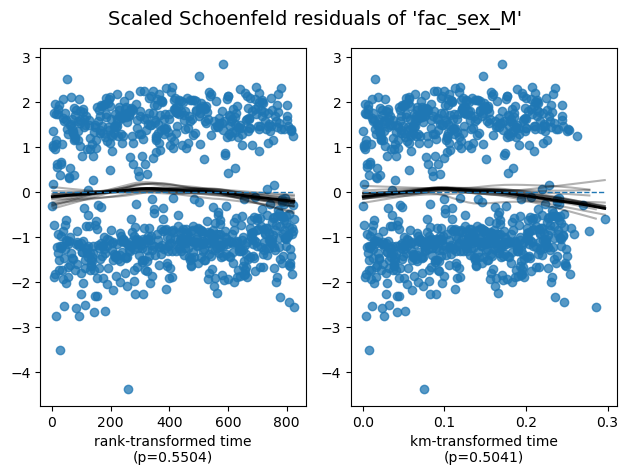

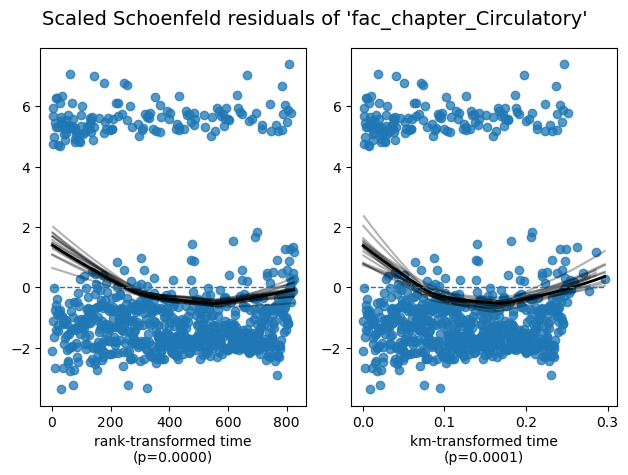

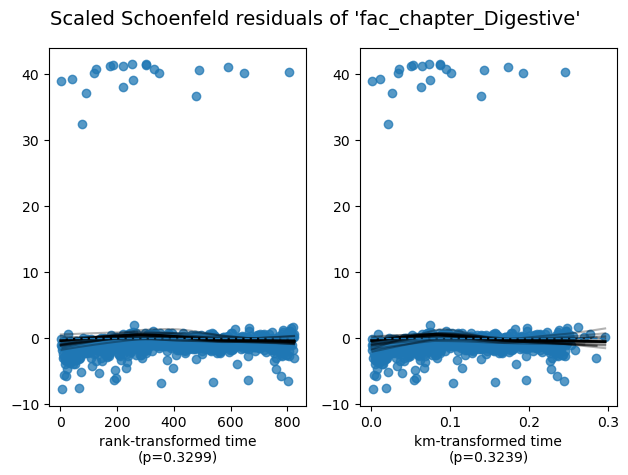

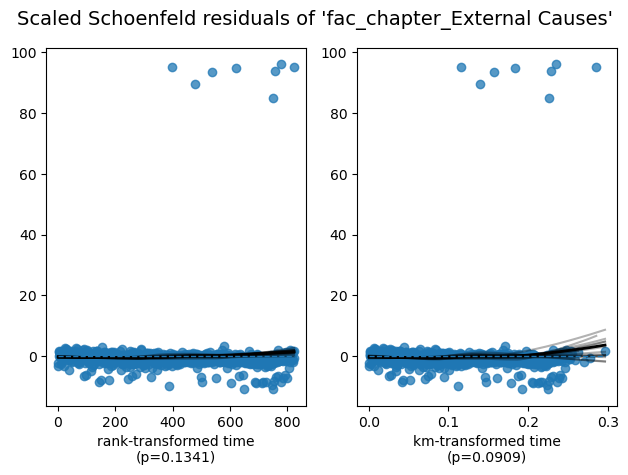

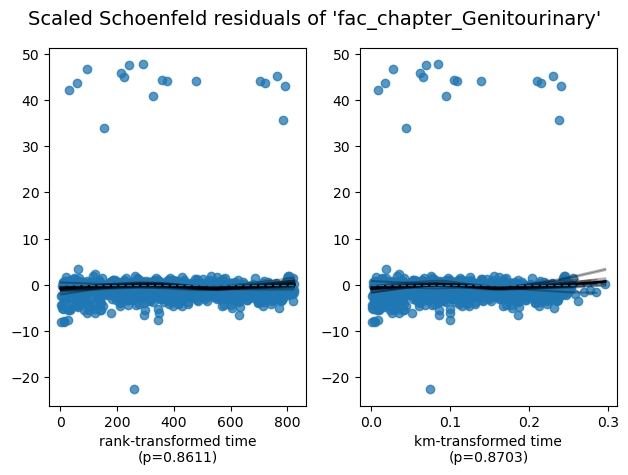

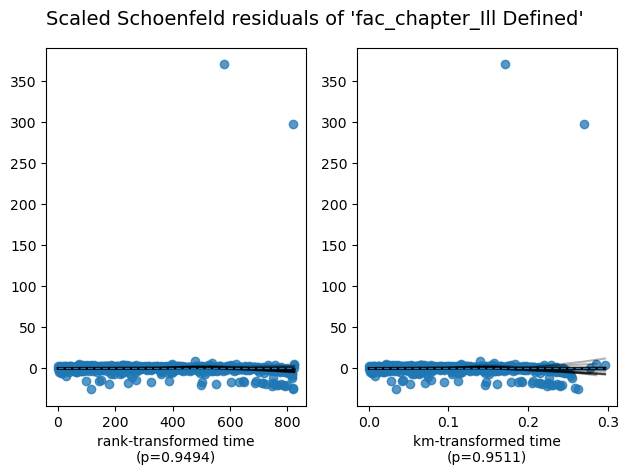

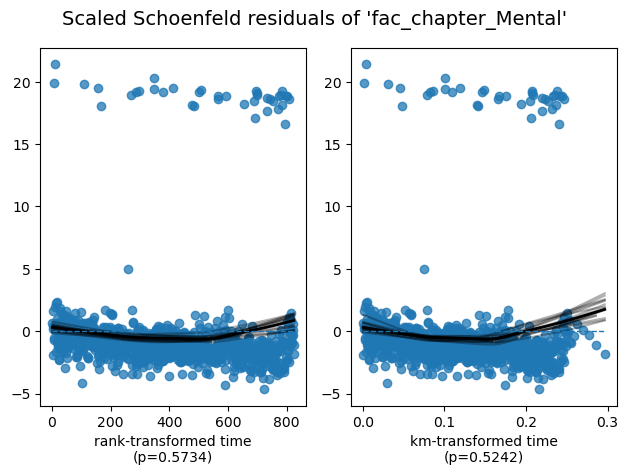

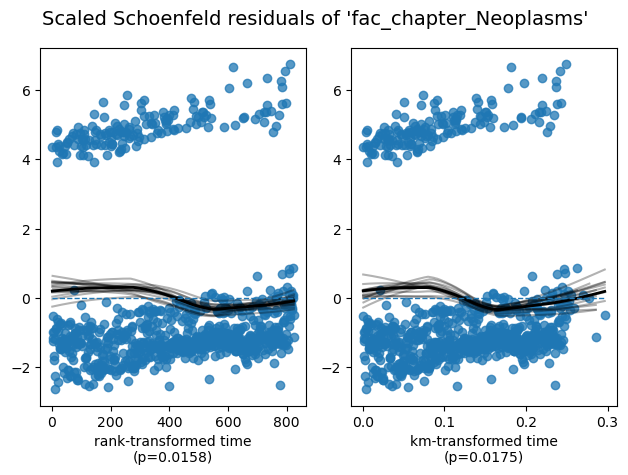

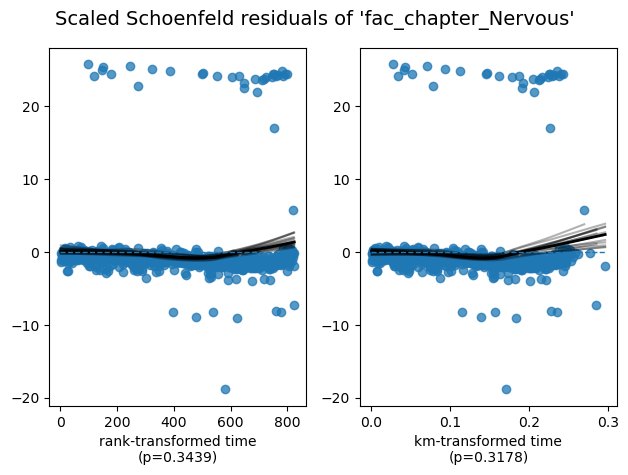

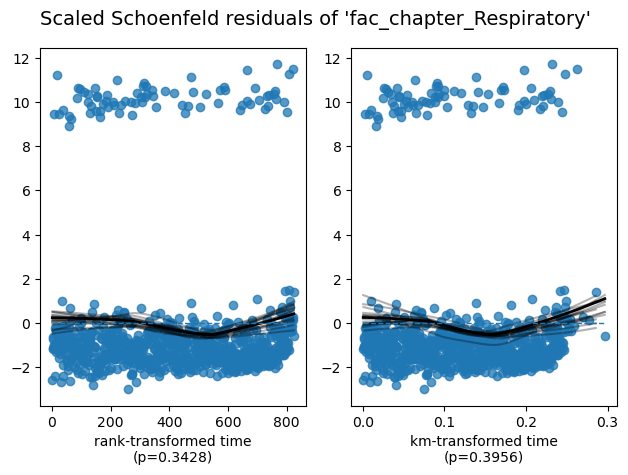

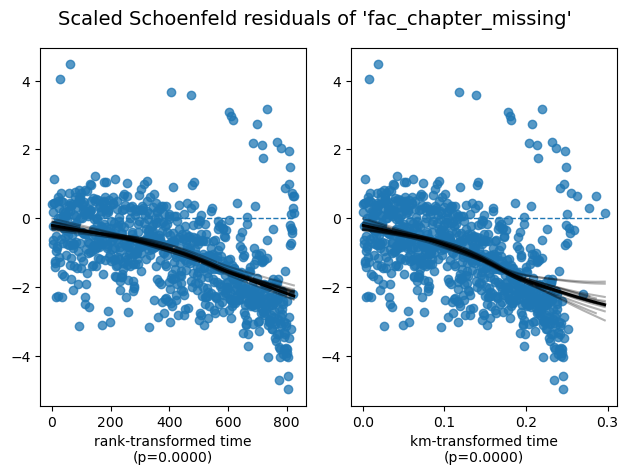

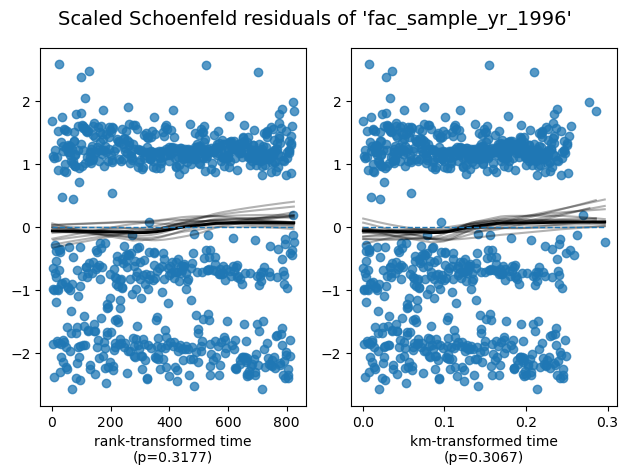

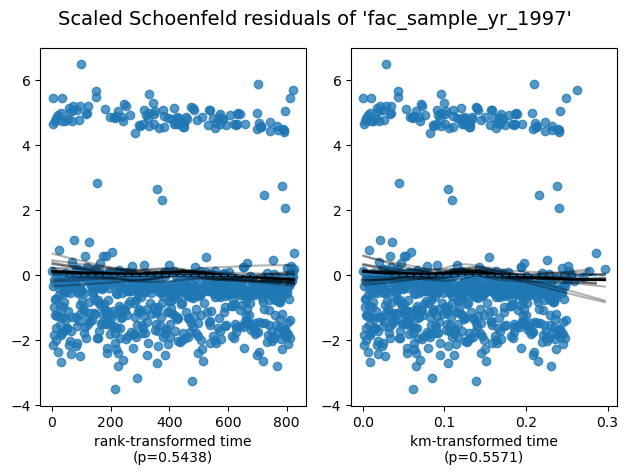

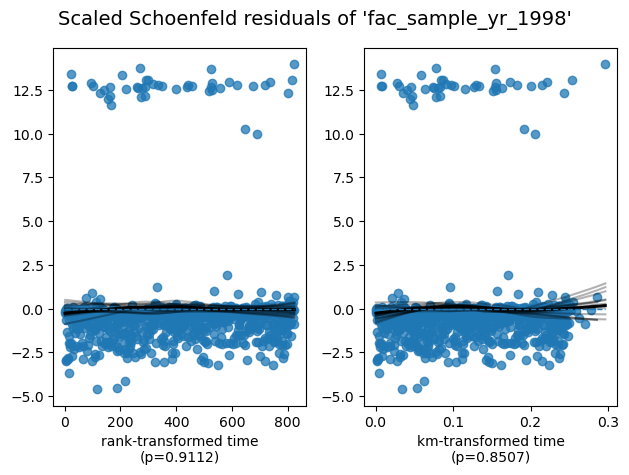

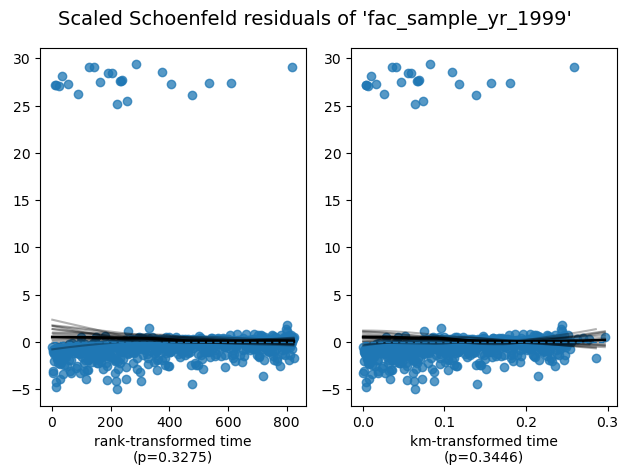

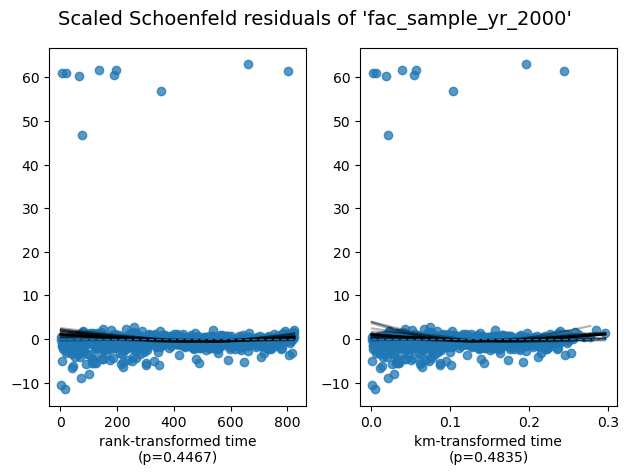

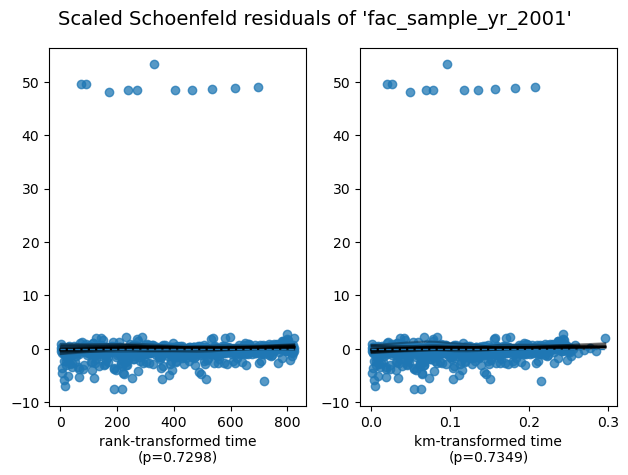

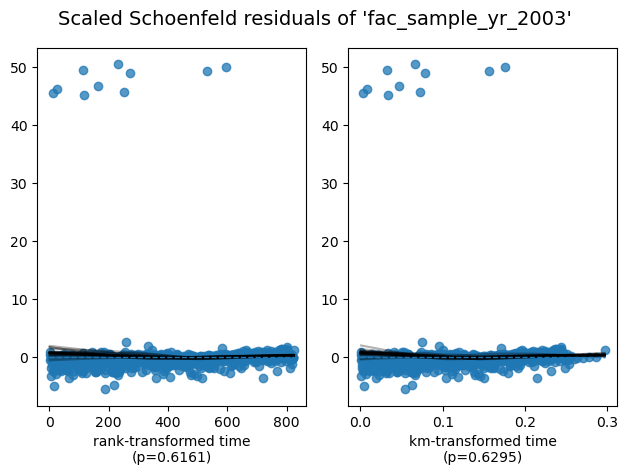

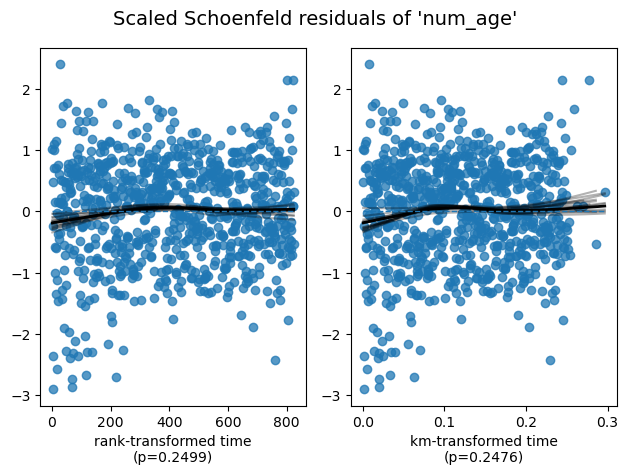

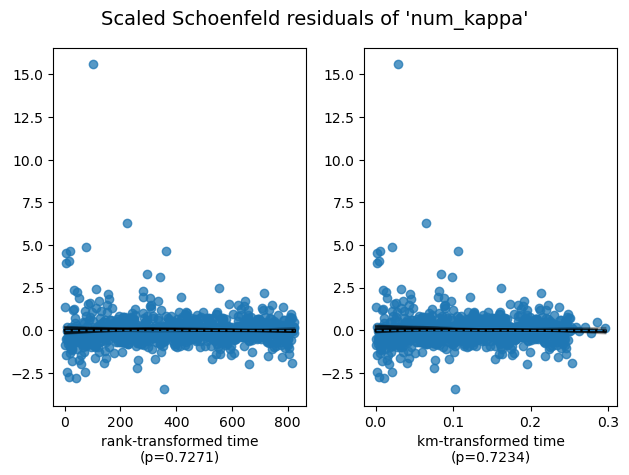

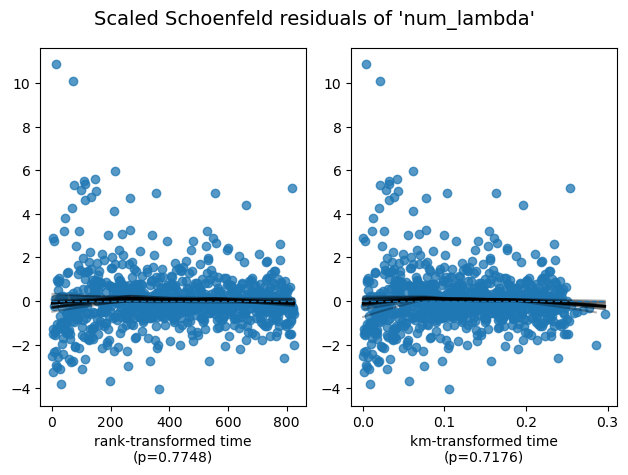

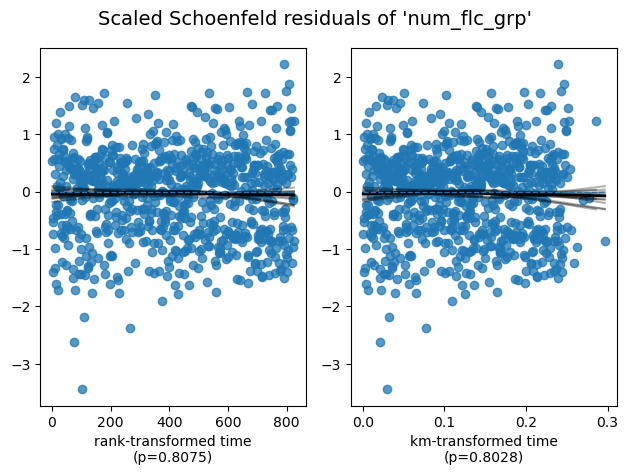

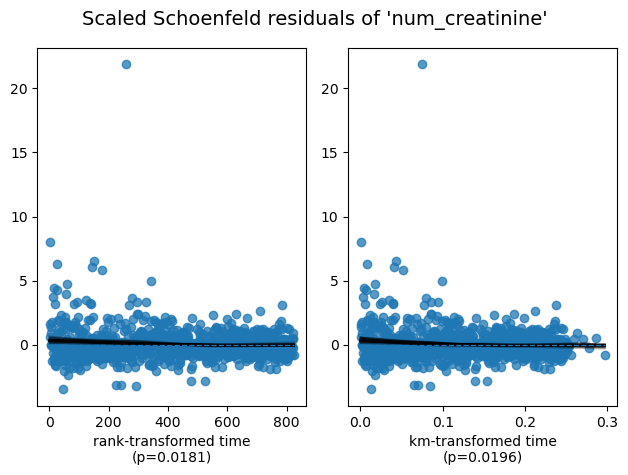

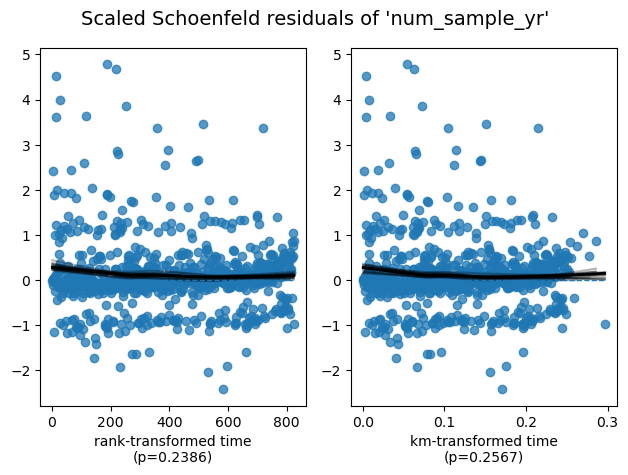

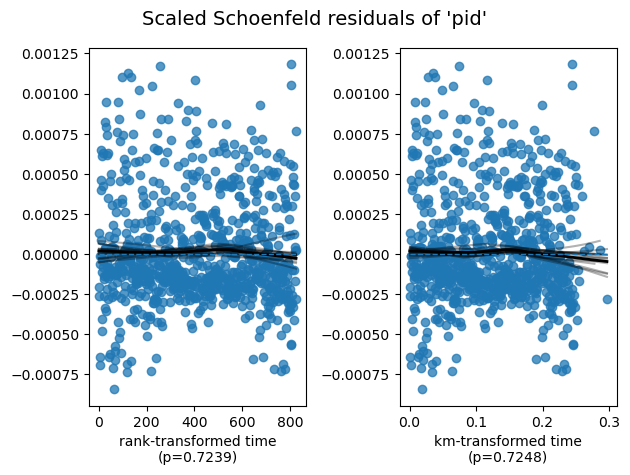

In [8]:
# data_pre = vae_train.drop(columns=['pid'], errors='ignore')
cox_model_vae.check_assumptions(vae_train, p_value_threshold=0.05, show_plots=True)

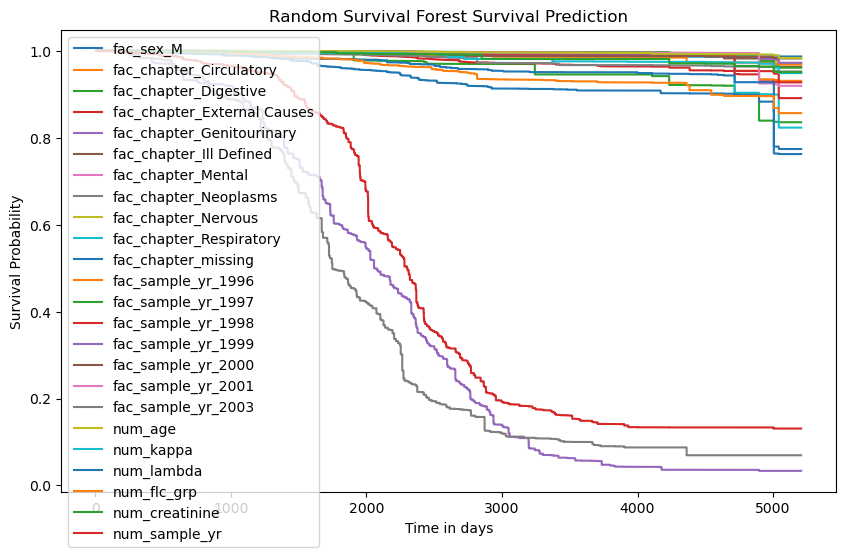

In [23]:
plt.figure(figsize=(10, 6))
covariate_names = vae_train.drop(columns=['pid', 'event', 'time'], errors='ignore').columns

for i, (s, covariate_name) in enumerate(zip(best_rsf_function, covariate_names)):
    if len(s) == len(best_rsf_model.unique_times_):
        plt.step(best_rsf_model.unique_times_, s, where="post", label=covariate_name)
    else:
        print(f"Skipping covariate {covariate_name} due to shape mismatch.")
        
plt.title("Random Survival Forest Survival Prediction")
plt.ylabel("Survival Probability")
plt.xlabel("Time in days")
plt.legend()
plt.show()

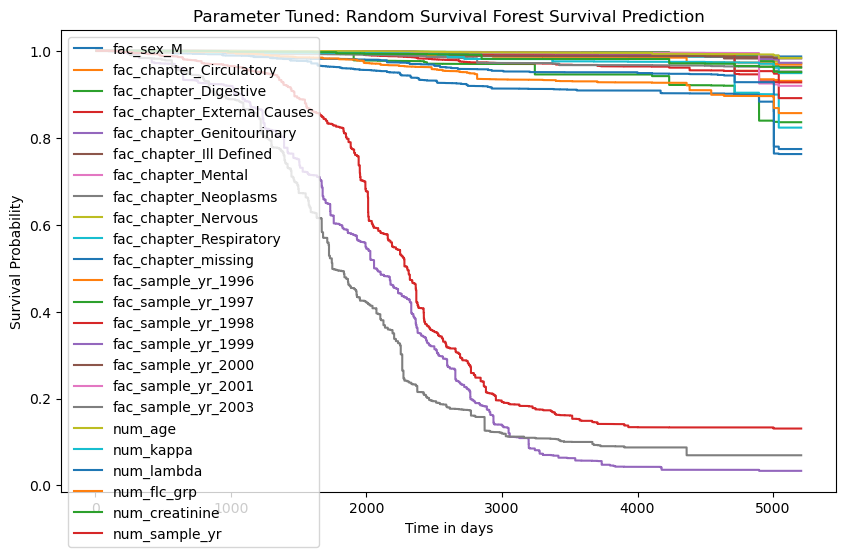

In [24]:
plt.figure(figsize=(10, 6))
covariate_names = vae_train.drop(columns=['pid', 'event', 'time'], errors='ignore').columns

for i, (s, covariate_name) in enumerate(zip(best_rsf_function, covariate_names)):
    if len(s) == len(best_rsf_model.unique_times_):
        plt.step(best_rsf_model.unique_times_, s, where="post", label=covariate_name)
    else:
        print(f"Skipping covariate {covariate_name} due to shape mismatch.")
        
plt.title("Parameter Tuned: Random Survival Forest Survival Prediction")
plt.ylabel("Survival Probability")
plt.xlabel("Time in days")
plt.legend()
plt.show()

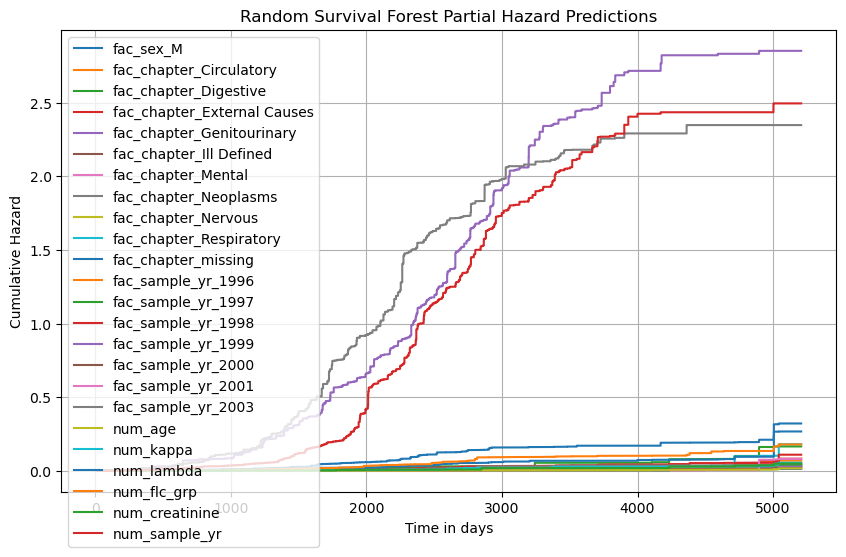

In [25]:
covariate_names = vae_train.drop(columns=['pid', 'event', 'time'], errors='ignore').columns

plt.figure(figsize=(10, 6))

# Plot each cumulative hazard function with its corresponding covariate label
for i, (s, covariate_name) in enumerate(zip(best_rsf_hazard, covariate_names)):
    if len(s) == len(best_rsf_model.unique_times_):  # Ensure they have the same length
        plt.step(best_rsf_model.unique_times_, s, where="post", label=covariate_name)
    else:
        print(f"Skipping covariate {covariate_name} due to shape mismatch.")

plt.title("Random Survival Forest Partial Hazard Predictions")
plt.ylabel("Cumulative Hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)
plt.show()

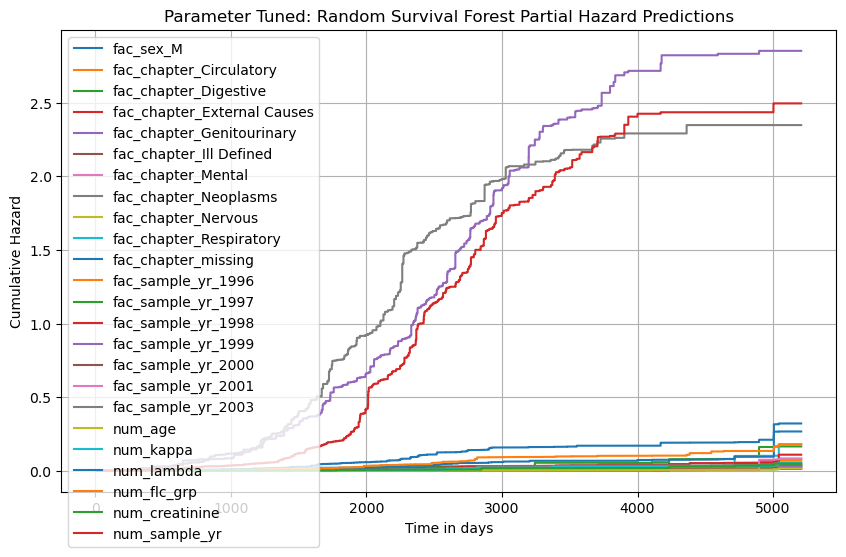

In [26]:
covariate_names = vae_train.drop(columns=['pid', 'event', 'time'], errors='ignore').columns


plt.figure(figsize=(10, 6))

# Plot each cumulative hazard function with its corresponding covariate label
for i, (s, covariate_name) in enumerate(zip(best_rsf_hazard, covariate_names)):
    if len(s) == len(best_rsf_model.unique_times_):  # Ensure they have the same length
        plt.step(best_rsf_model.unique_times_, s, where="post", label=covariate_name)
    else:
        print(f"Skipping covariate {covariate_name} due to shape mismatch.")

plt.title("Parameter Tuned: Random Survival Forest Partial Hazard Predictions")
plt.ylabel("Cumulative Hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)
plt.show()

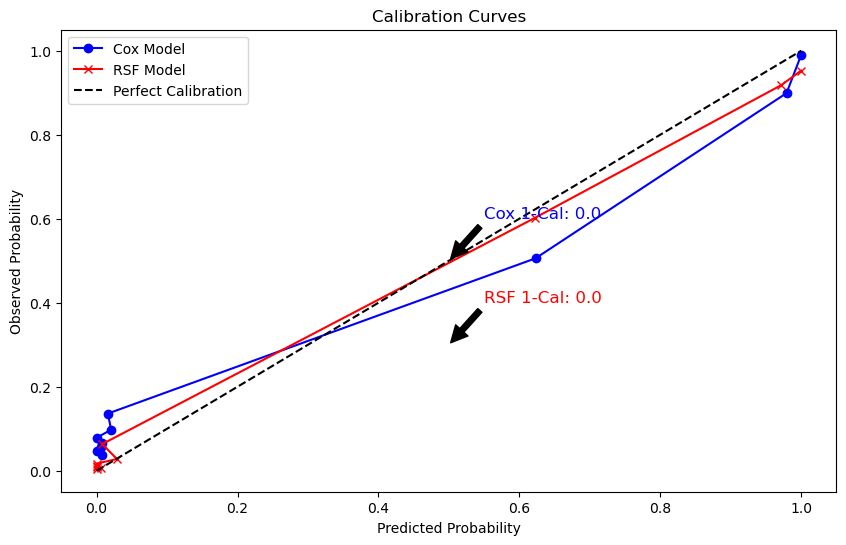

In [27]:
plot_calibration_curve(vae_metrics['cox_one_cal'][1], vae_metrics['cox_one_cal'][2], vae_metrics['rsf_one_cal'][1], vae_metrics['rsf_one_cal'][2])

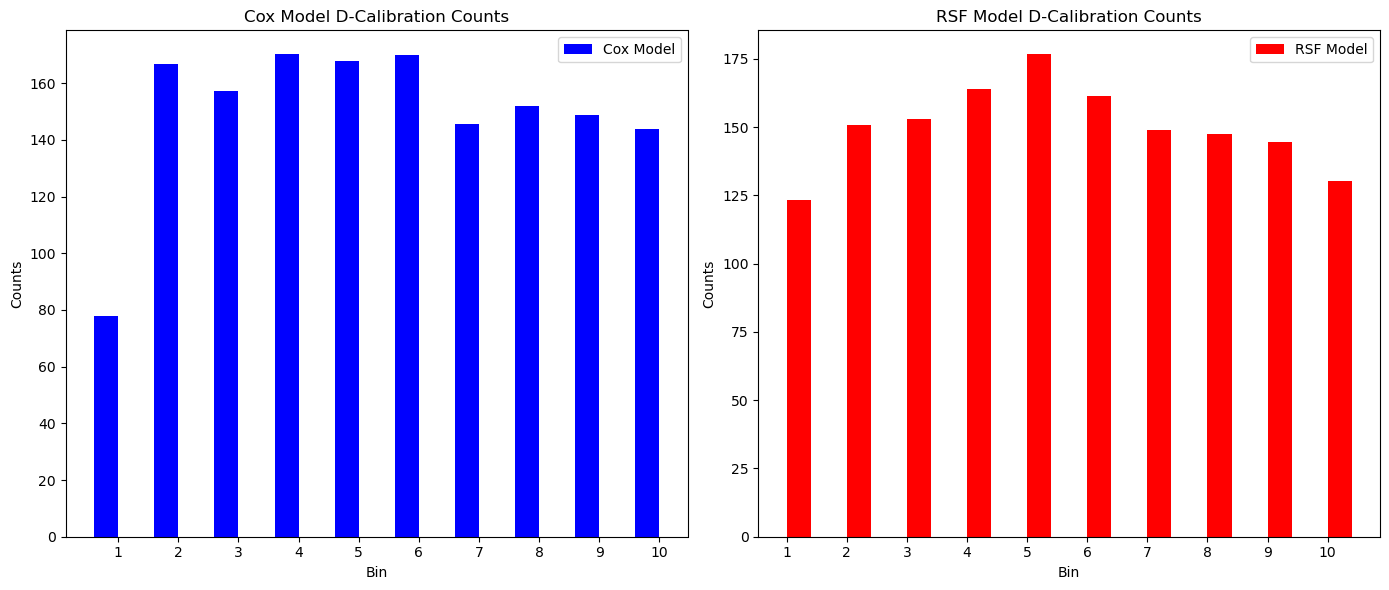

In [28]:
plot_d_calibration(vae_metrics['cox_d_cal'][1], vae_metrics['rsf_d_cal'][1])